# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | port macquarie
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | sobolevo
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | swellendam
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | diebougou
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | vrises
Processing Record 13 of Set 1 | vidim
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | marinette
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | marzuq
Processing Record 21 of Set 1 | akyab
Processing Record 22 of Set 1 | sept-iles
Processing Record

Processing Record 38 of Set 4 | kefalos
Processing Record 39 of Set 4 | maniitsoq
Processing Record 40 of Set 4 | haibowan
City not found. Skipping...
Processing Record 41 of Set 4 | beisfjord
Processing Record 42 of Set 4 | zhanakorgan
Processing Record 43 of Set 4 | baykit
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | landeck
Processing Record 48 of Set 4 | shubarkuduk
Processing Record 49 of Set 4 | nanortalik
Processing Record 0 of Set 5 | gilazi
City not found. Skipping...
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | ambovombe
Processing Record 3 of Set 5 | buala
Processing Record 4 of Set 5 | cabo san lucas
Processing Record 5 of Set 5 | tanda
Processing Record 6 of Set 5 | dawlatabad
Processing Record 7 of Set 5 | hualmay
Processing Record 8 of Set 5 | dunedin
Processing Record 9 of Set 5 | bargal
City not found. Skipping...
Processing Record 10 

Processing Record 24 of Set 8 | vilyuysk
Processing Record 25 of Set 8 | khor
Processing Record 26 of Set 8 | amambai
Processing Record 27 of Set 8 | ponta delgada
Processing Record 28 of Set 8 | asau
Processing Record 29 of Set 8 | saint-pierre
Processing Record 30 of Set 8 | omsukchan
Processing Record 31 of Set 8 | barrow
Processing Record 32 of Set 8 | palu
Processing Record 33 of Set 8 | sola
Processing Record 34 of Set 8 | arrecife
Processing Record 35 of Set 8 | vila velha
Processing Record 36 of Set 8 | olivenza
Processing Record 37 of Set 8 | ixtapa
Processing Record 38 of Set 8 | tyukhtet
Processing Record 39 of Set 8 | dezful
Processing Record 40 of Set 8 | port pirie
Processing Record 41 of Set 8 | kailua
Processing Record 42 of Set 8 | makasar
Processing Record 43 of Set 8 | champerico
Processing Record 44 of Set 8 | bolshaya atnya
City not found. Skipping...
Processing Record 45 of Set 8 | sarh
Processing Record 46 of Set 8 | collingwood
Processing Record 47 of Set 8 | sa

Processing Record 11 of Set 12 | san patricio
Processing Record 12 of Set 12 | zachary
Processing Record 13 of Set 12 | phangnga
Processing Record 14 of Set 12 | labuan
Processing Record 15 of Set 12 | phetchaburi
Processing Record 16 of Set 12 | vazante
Processing Record 17 of Set 12 | khonuu
City not found. Skipping...
Processing Record 18 of Set 12 | dzhida
Processing Record 19 of Set 12 | lubsko
Processing Record 20 of Set 12 | cockburn town
Processing Record 21 of Set 12 | dali
Processing Record 22 of Set 12 | mount gambier
Processing Record 23 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 24 of Set 12 | quballat
Processing Record 25 of Set 12 | hambantota
Processing Record 26 of Set 12 | manta
Processing Record 27 of Set 12 | kyaukse
Processing Record 28 of Set 12 | novyy urengoy
Processing Record 29 of Set 12 | kampene
Processing Record 30 of Set 12 | port lincoln
Processing Record 31 of Set 12 | nome
Processing Record 32 of Set 12 | jiangyou
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,24.16,88,40,6.17,ZA,1675789308
1,mahebourg,-20.4081,57.7000,27.16,74,40,5.66,MU,1675789324
2,port macquarie,-31.4333,152.9167,20.04,78,37,1.25,AU,1675789325
3,albany,42.6001,-73.9662,2.80,46,55,2.24,US,1675789232
4,sobolevo,54.4299,31.8996,-12.74,98,17,1.20,RU,1675789336


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,24.16,88,40,6.17,ZA,1675789308
1,mahebourg,-20.4081,57.7000,27.16,74,40,5.66,MU,1675789324
2,port macquarie,-31.4333,152.9167,20.04,78,37,1.25,AU,1675789325
3,albany,42.6001,-73.9662,2.80,46,55,2.24,US,1675789232
4,sobolevo,54.4299,31.8996,-12.74,98,17,1.20,RU,1675789336


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

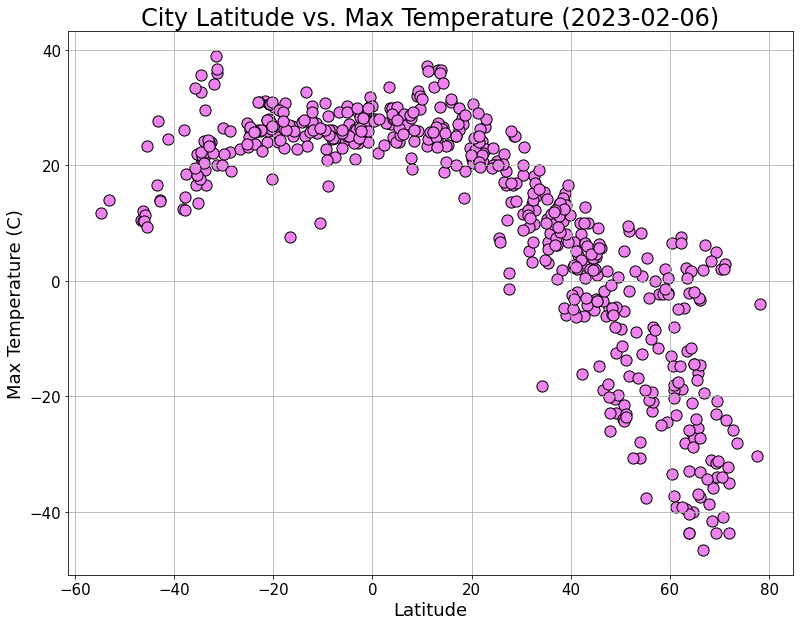

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize = (13,10))
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-02-06)", fontsize = 24)
plt.xlabel("Latitude", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Max Temperature (C)", fontsize = 18)
plt.yticks(fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

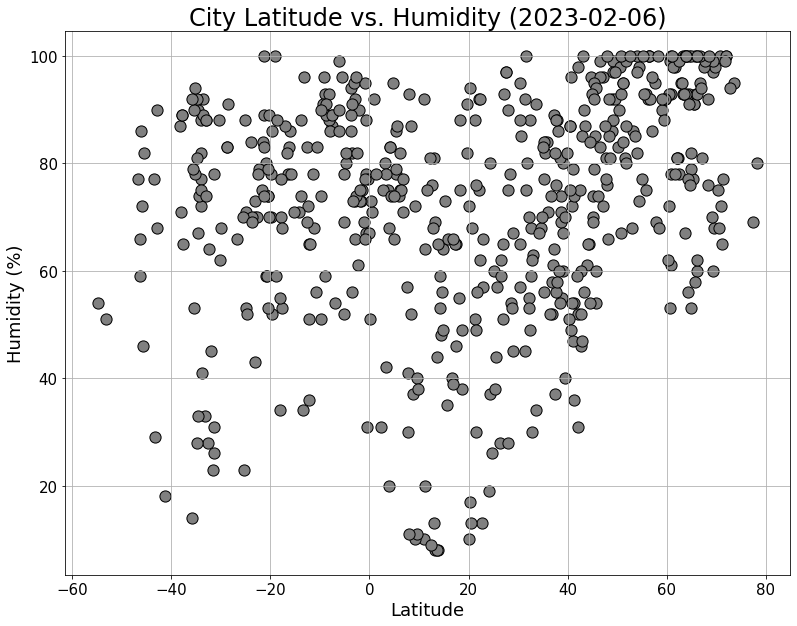

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (13,10))
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'gray', edgecolors = 'black', s = 125)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-06)", fontsize = 24)
plt.xlabel("Latitude", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Humidity (%)", fontsize = 18)
plt.yticks(fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

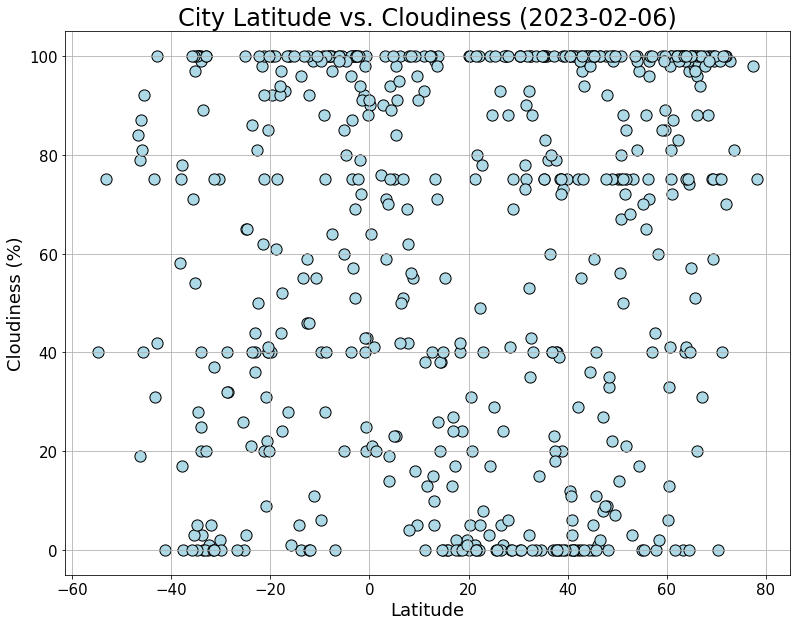

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize = (13,10))
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'lightblue', edgecolors = 'black', s = 125)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-06)", fontsize = 24)
plt.xlabel("Latitude", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 18)
plt.yticks(fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

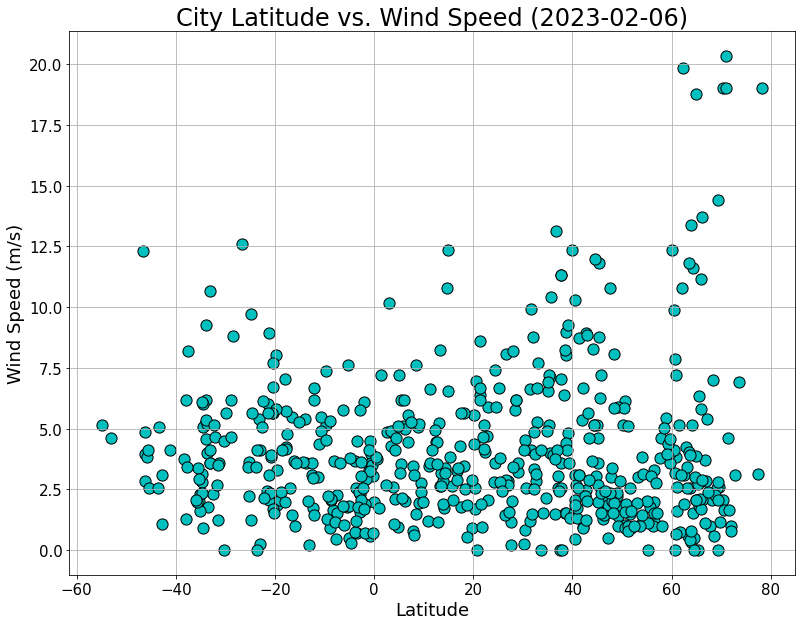

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (13,10))
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'c', edgecolors = 'black', s = 125)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-06)", fontsize = 24)
plt.xlabel("Latitude", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Wind Speed (m/s)", fontsize = 18)
plt.yticks(fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression():
    tem_slope, tem_int, tem_r, tem_p, tem_std_err = linregress(x_axis, y_axis)
    tem_fit = tem_slope * x_axis + tem_int
    line_eq = "y= " + str(round(tem_slope,2)) + "x + " + str(round(tem_int,2))

    return plt.plot(x_axis, tem_fit, color = 'r'),\
           plt.annotate(line_eq, (x,y), fontsize = 25, color = "red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df.loc[city_data_df["Lat"] >= 0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,albany,42.6001,-73.9662,2.80,46,55,2.24,US,1675789232
4,sobolevo,54.4299,31.8996,-12.74,98,17,1.20,RU,1675789336
5,provideniya,64.3833,-173.3000,-26.29,93,74,1.54,RU,1675789336
7,lavrentiya,65.5833,-171.0000,-25.38,91,100,1.82,RU,1675789337
9,diebougou,10.9667,-3.2500,37.19,10,93,1.21,BF,1675789338


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df.loc[city_data_df["Lat"] < 0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,24.16,88,40,6.17,ZA,1675789308
1,mahebourg,-20.4081,57.7000,27.16,74,40,5.66,MU,1675789324
2,port macquarie,-31.4333,152.9167,20.04,78,37,1.25,AU,1675789325
6,swellendam,-34.0226,20.4417,21.23,72,100,5.18,ZA,1675789337
8,bluff,-46.6000,168.3333,10.45,77,84,12.29,NZ,1675789338


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8665044842151874


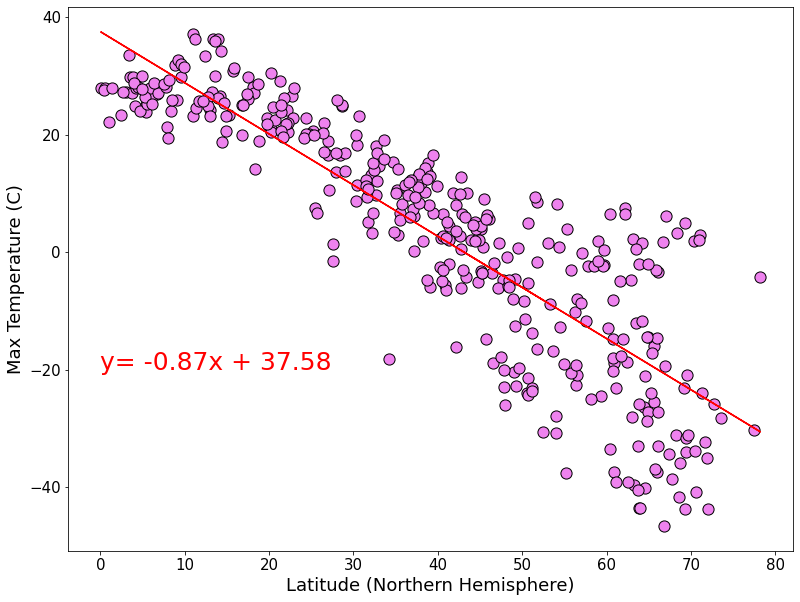

In [17]:
# Linear regression on Northern Hemisphere
plt.figure(figsize = (13,10))
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=0
y=-20
linear_regression()
 
plt.xlabel("Latitude (Northern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Max Temperature (C)", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

The r-value is: 0.47908903869468783


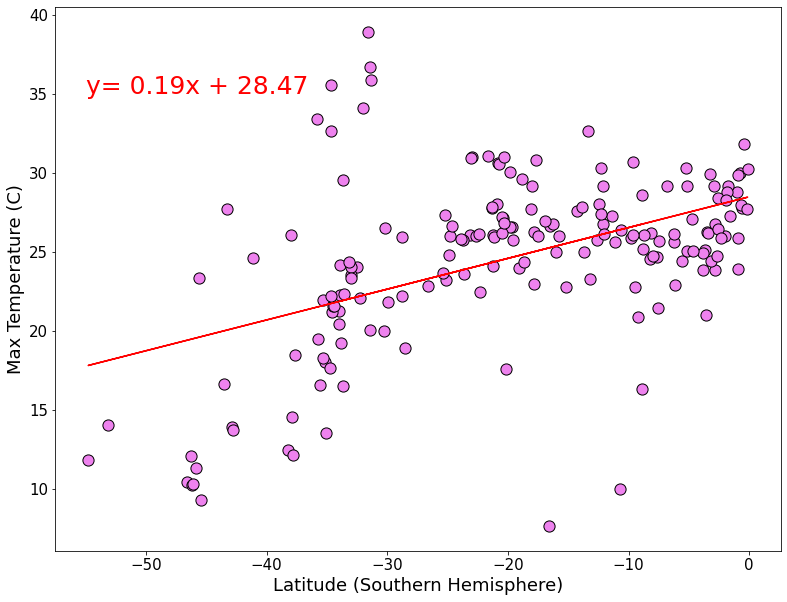

In [18]:
# Linear regression on Southern Hemisphere
plt.figure(figsize = (13,10))
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=-55
y=35
linear_regression()

plt.xlabel("Latitude (Southern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Max Temperature (C)", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

**Discussion about the linear relationship:** When analyzing the correlation between Maximum Temperature and Latitude in Northern Hemisphere we can observe a strong negative correlation between variables. The Temperature is in a high dependency of Latitude, the closer we are to the Equator the higher is the Temperature.
The graph for the Southern Hemisphere is not so categorical, the Temperature range is much lower and the dispersion is wider with no such evident correlation but positive r-value that also shows higher temperatires towards Equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.49760704471626854


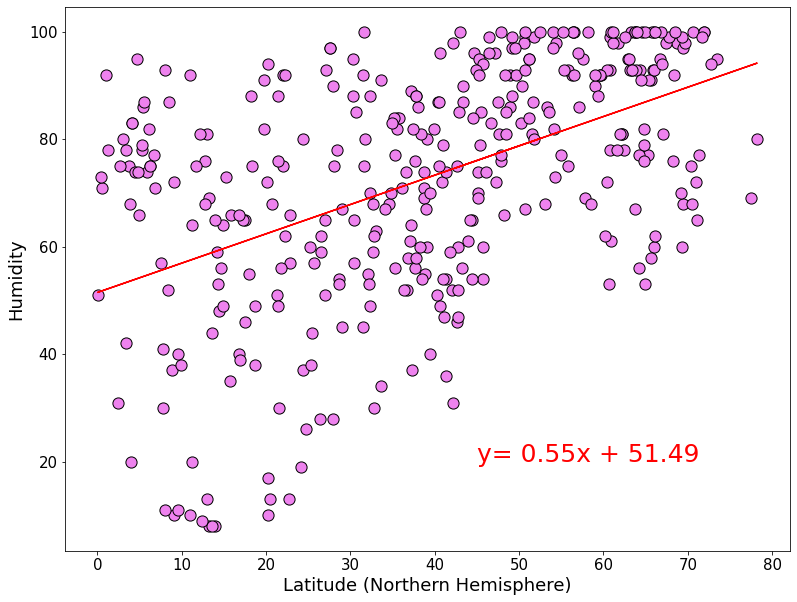

In [19]:
# Northern Hemisphere
plt.figure(figsize = (13,10))
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=45
y=20
linear_regression()

plt.xlabel("Latitude (Northern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Humidity", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

The r-value is: 0.23403072298891137


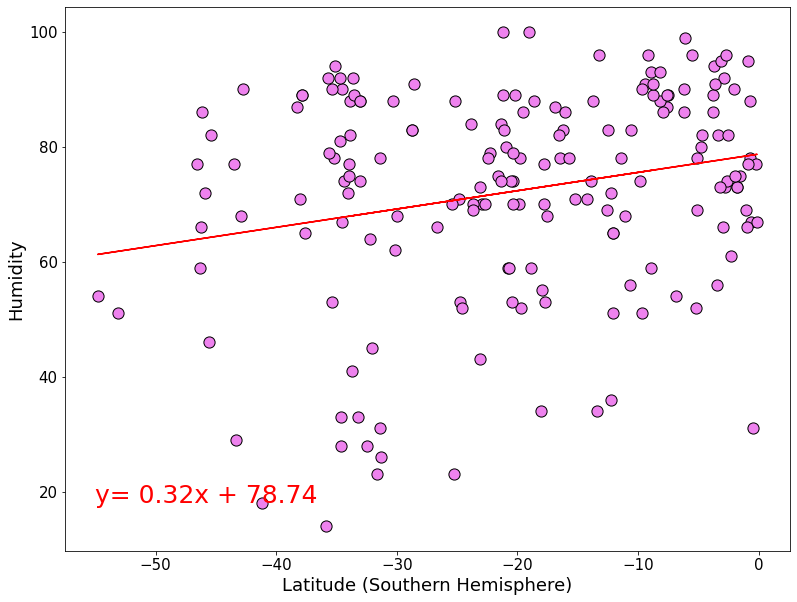

In [20]:
# Southern Hemisphere
plt.figure(figsize = (13,10))
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=-55
y=18
linear_regression()

plt.xlabel("Latitude (Southern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Humidity", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere graph shows a moderate positive correlation between Latitude and Humidity however when looking closer at the higher Latitude marks the dots become constrained. At the Latitude greater than 40 we can see a stronger positive correlation showing that the Humidity increases as we move away from the Equator.
Southern Hemisphere graph doesn't show a strong correlation however the r-value is positive, that represents the increase in Humidity value towards the Equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2518060407169722


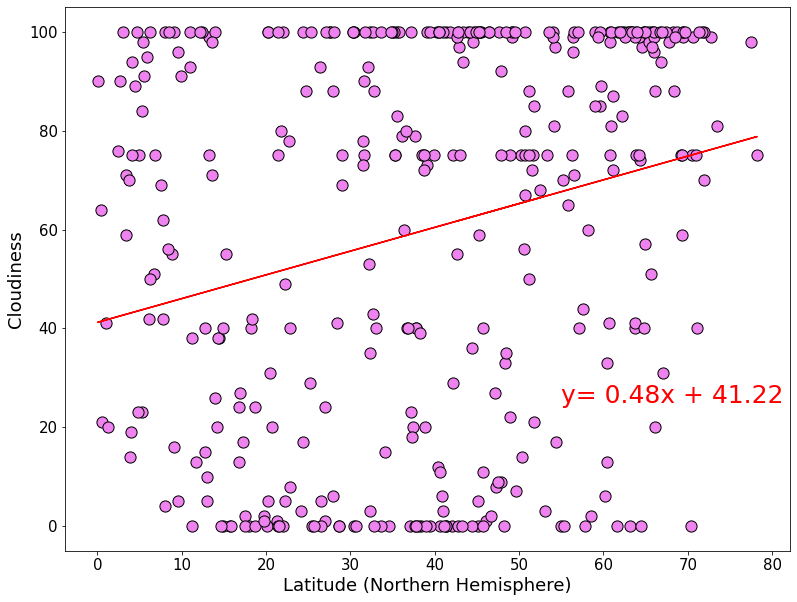

In [23]:
# Northern Hemisphere
plt.figure(figsize = (13,10))
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=55
y=25
linear_regression()

plt.xlabel("Latitude (Northern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Cloudiness", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

The r-value is: 0.25783043000408634


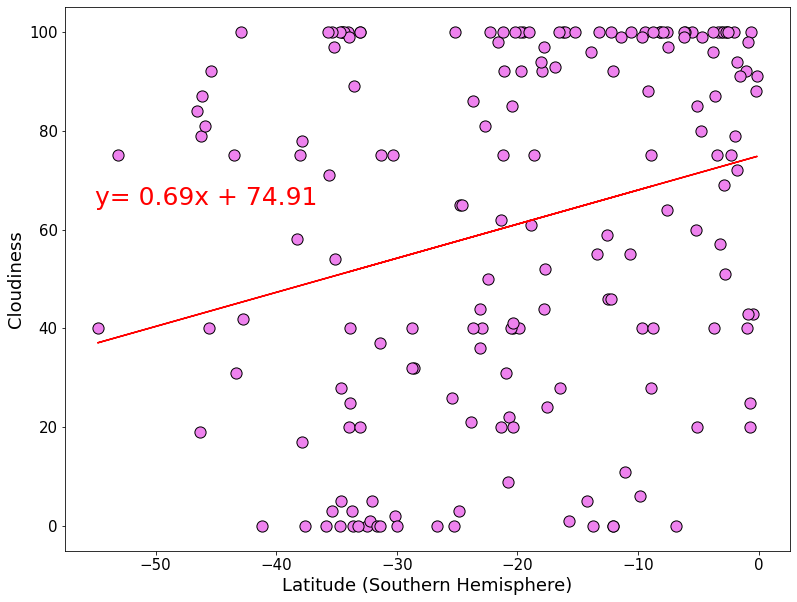

In [26]:
# Southern Hemisphere
plt.figure(figsize = (13,10))
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=-55
y=65
linear_regression()

plt.xlabel("Latitude (Southern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Cloudiness", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

**Discussion about the linear relationship:** Cloudiness has a weak correlation with Latitude. Northern Hemisphere graph shows tendency of higher Cloudiness index as we move away from Equator. Southern Hemisphere shows higher Cloudiness as we move towards the Equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0505055326116551


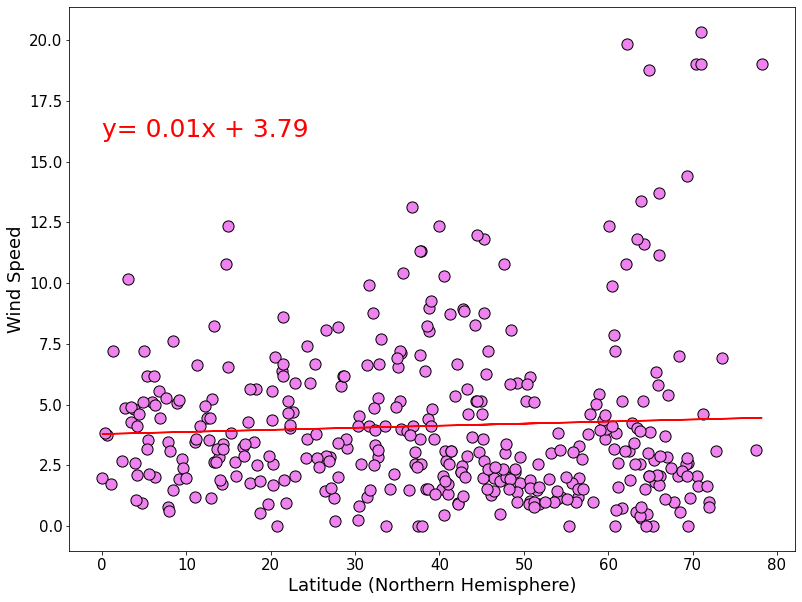

In [27]:
# Northern Hemisphere
plt.figure(figsize = (13,10))
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=0
y=16
linear_regression()

plt.xlabel("Latitude (Northern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Wind Speed", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

The r-value is: -0.2465079159127493


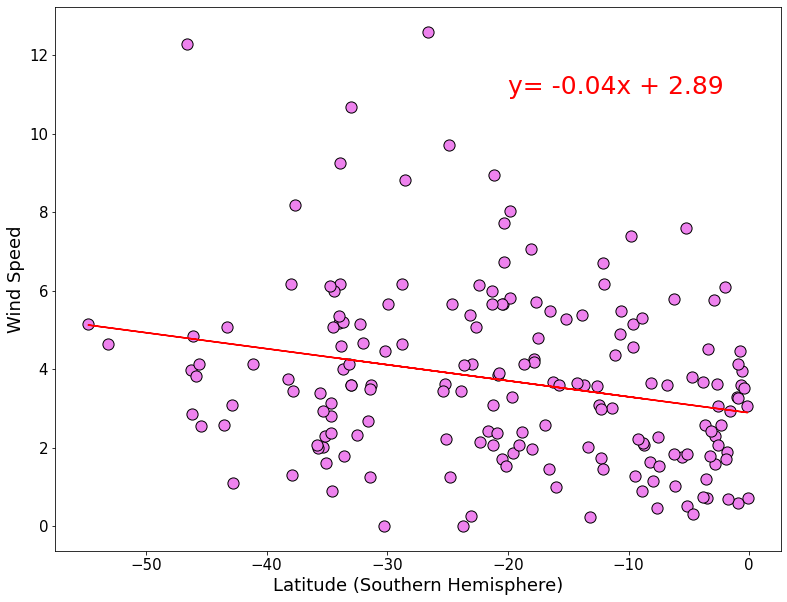

In [28]:
# Southern Hemisphere
plt.figure(figsize = (13,10))
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=-20
y=11
linear_regression()

plt.xlabel("Latitude (Southern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Wind Speed", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

**Discussion about the linear relationship:** The Wind Speed value is pretty much spread uniform along the Latitude range in the Northern Hemisphere.
Southern Hemisphere graph shows a weak negative correlation between Latitude and Wind Speed pointing toward the fact that Wind blows harder as we move away from Equator.